In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets

In [2]:
# df = pd.read_csv("data/swissbanknotes.txt", sep=' ', index_col='key')
# df
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
X0 = X
print(X0[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


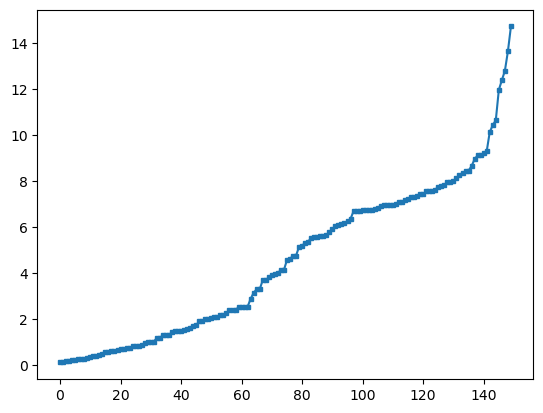

[5.84333333 3.05733333 3.758      1.19933333]


In [4]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.show()
print(c0)

0.9466666666666667


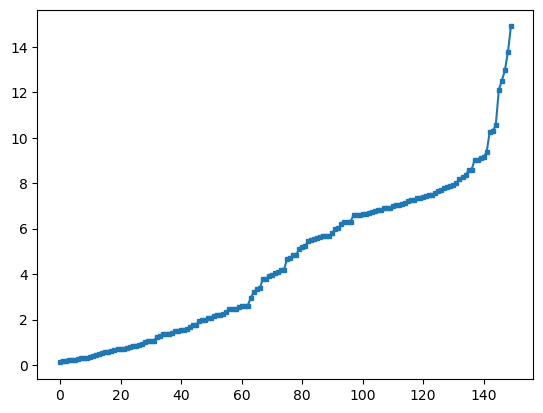

[5.82535738 3.07528481 3.74105151 1.21354908]


In [5]:
N = len(X0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

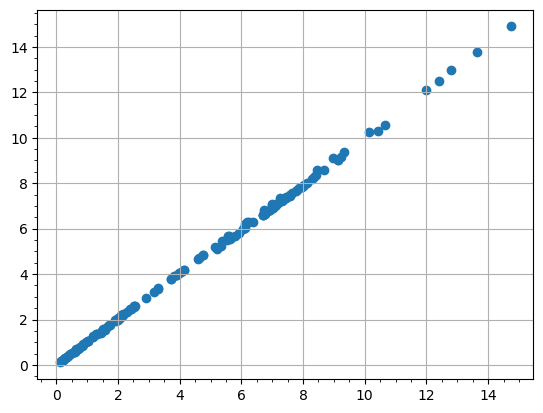

In [6]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [7]:
X1 = X0 - c
X1_0 = X0 - c0

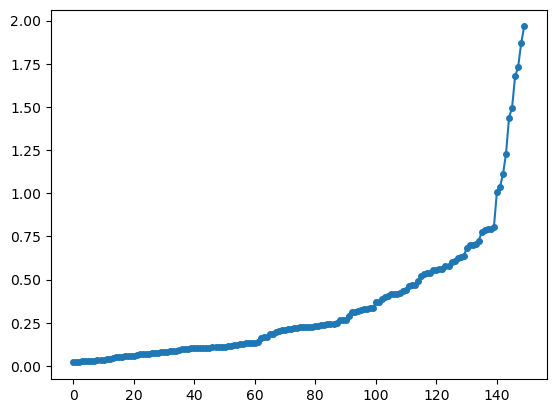

630.0080141991947 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


In [8]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

0.92


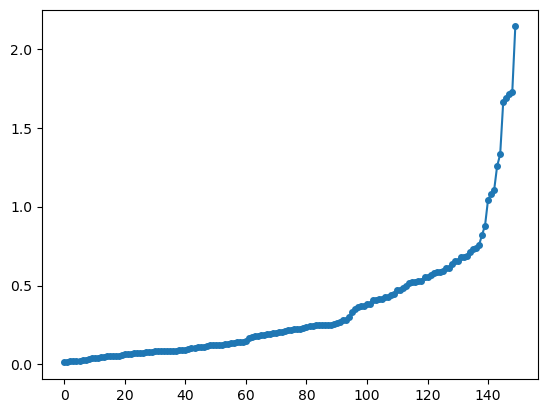

3.743168218040692 [ 0.3538558  -0.10375299  0.85760729  0.35851237]


In [19]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

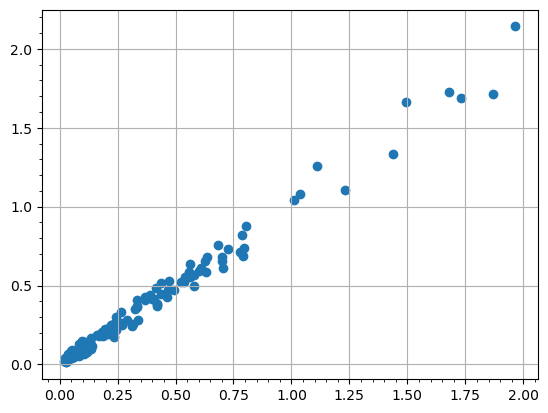

In [20]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

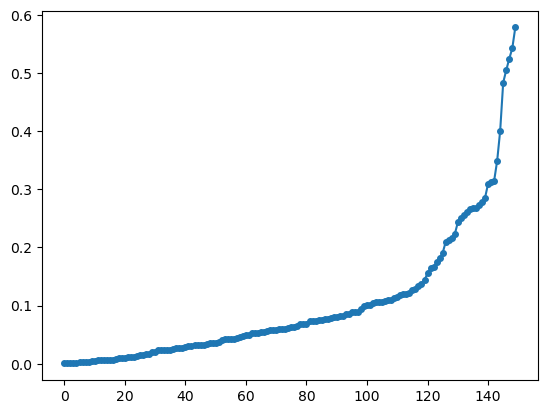

36.2021435144042 [ 0.65850484  0.73057333 -0.16560966 -0.07216251]


In [12]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9333333333333333


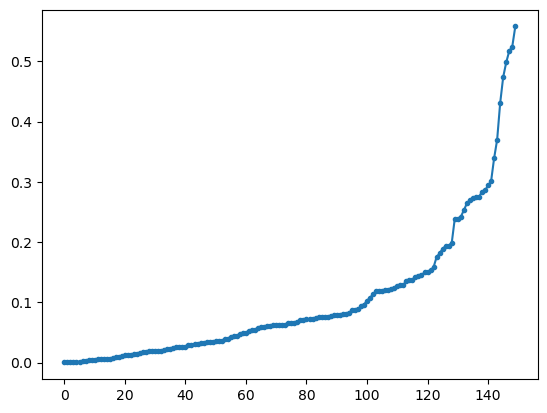

0.24057757165122964 [ 0.66702262  0.72162057 -0.17540789 -0.05980506]


In [13]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

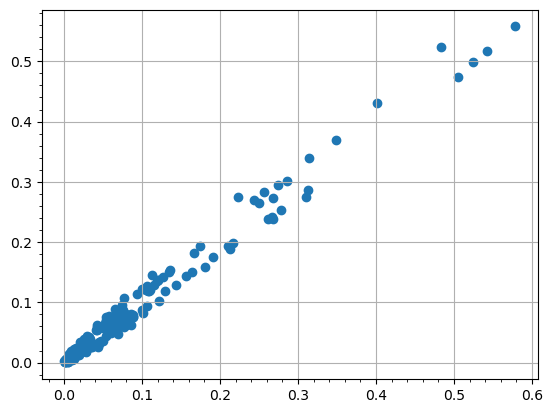

In [14]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [21]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

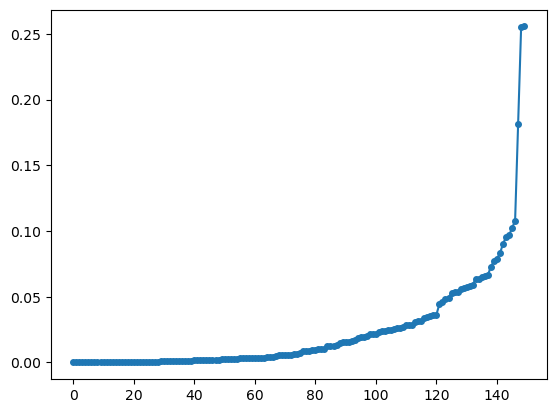

11.78289094625301 [-0.5779778   0.59898597  0.07931493  0.54851309]


In [22]:
a3_0, L3_0 = pca.find_pc(X3)
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4)
plt.show()
print(L3_0, a3_0)

0.9333333333333333


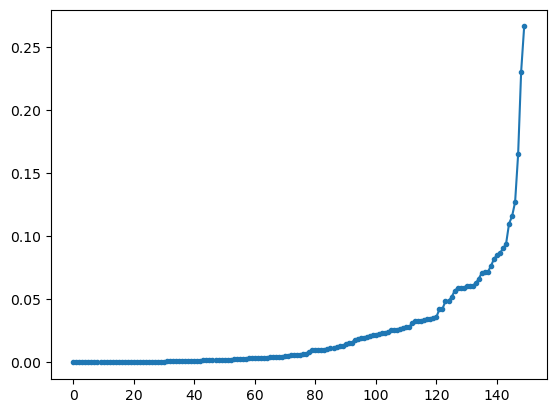

0.07710842151357818 [-0.58269834  0.60420991  0.08695101  0.53650028]


In [27]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=3)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

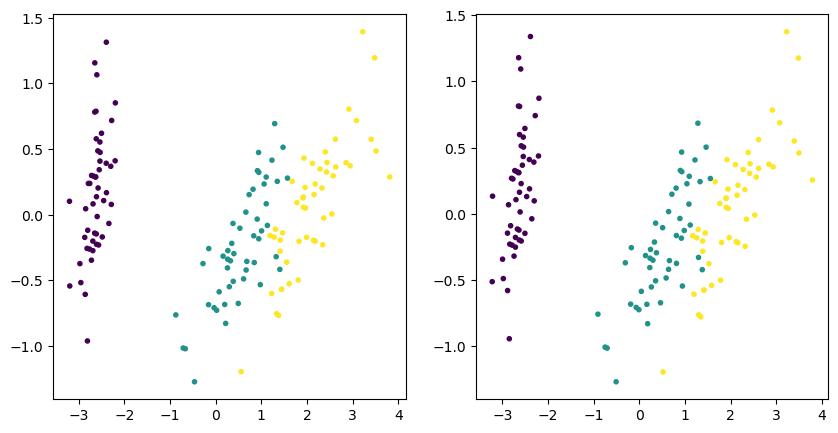

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, s=9, c=Y)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, s=9,c=Y)
plt.show()

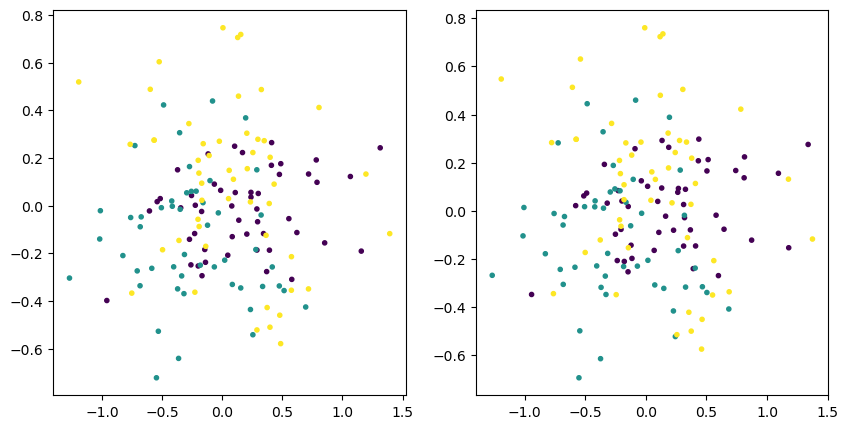

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U2, U3, s=9, c=Y)
plt.subplot(1,2,2)
plt.scatter(U2_0, U3_0, s=9,c=Y)
plt.show()

In [16]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [17]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.88)
S = robust_scatter_matrix(X1, wma)
print(S)

[[ 2.36012828 -1.62387129 -2.02216981  2.03484851]
 [-1.62387129  2.87189846  1.86640493 -2.19520502]
 [-2.02216981  1.86640493  2.65727801 -3.79175185]
 [ 2.03484851 -2.19520502 -3.79175185  6.638786  ]]


In [18]:
L, A = np.linalg.eig(S)
print(A)

[[ 0.34170194 -0.49165116  0.6997444  -0.38971361]
 [-0.36335242  0.64466025  0.66901205  0.06936181]
 [-0.47941797  0.04055323 -0.21124667 -0.85081648]
 [ 0.72206178  0.58399292 -0.13474238 -0.34557712]]
